In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

digits = datasets.load_digits()

print(digits.images.shape, digits.target.shape, end='\n')

images_and_label = list(zip(digits.images, digits.target))

(1797, 8, 8) (1797,)


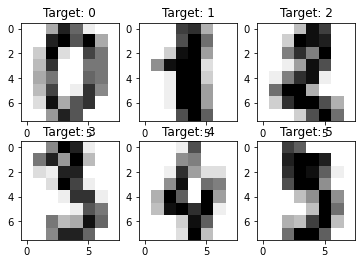

In [2]:
#  show image and label
for index, (image, label) in enumerate(images_and_label[:6]):
    plt.subplot(2, 3, index + 1)  # 2 row, 3 column, plot image and label
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # gray scale image
    plt.title('Target: %i' % label)
plt.show()

In [3]:
# to apply a classifier on this data, we need to flatten the image : instead of a 8x8 matirx,
# we have to use a one-dimensional array with 64 items
data = digits.images.reshape((len(digits.images), -1)) #  reshape(# of row, # of col)


print(data.shape)

(1797, 64)


In [4]:
param_grid = { 'C' : [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 200], 
              'gamma' : [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}

classifier = svm.SVC()

#  70% of original data-set is for training
train_test_split = int(len(digits.images) * 0.7)
grid = GridSearchCV(classifier, param_grid, refit=True)

grid.fit(data[:train_test_split], digits.target[:train_test_split])
print(grid.best_estimator_)

SVC(C=1, gamma=0.001)


In [5]:
grid_prediction = grid.predict(data[train_test_split:])
print(confusion_matrix(digits.target[train_test_split:], grid_prediction))
print(accuracy_score(digits.target[train_test_split:], grid_prediction))

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]
0.9703703703703703


In [6]:
classifier.fit(data[:train_test_split], digits.target[:train_test_split])

#  now predict the value of the digit on the 25%
expected = digits.target[train_test_split:]
predicted = classifier.predict(data[train_test_split:])
print(f"confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}\n" )
print(accuracy_score(expected, predicted))


confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  3  0  1  5  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  1  0  0  0  0  0  0 50  1]
 [ 0  0  0  1  0  2  0  1  0 51]]

0.9537037037037037


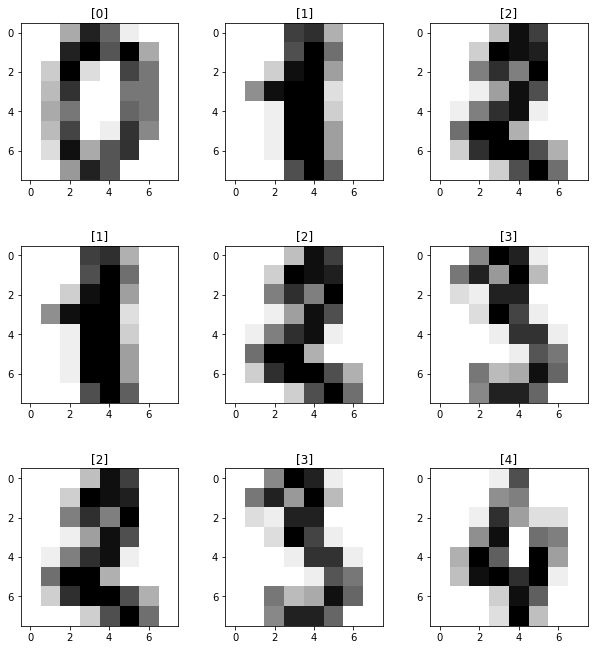

In [7]:
# let's test on the last few images

fig, sub = plt.subplots(3, 3, figsize = (9, 9))
plt.subplots_adjust(left=0.125, bottom=0, right=1, top=1, wspace=0.3, hspace=0.1)
for i in range(3):
    for j in range(3):
    
        sub[i][j].imshow(digits.images[i+j], cmap=plt.cm.gray_r, interpolation='nearest')
        sub[i][j].set_title(str(classifier.predict(data[i+j].reshape(1,-1))))
plt.show()
